In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv("./CO2 Emissions_Canada.csv")
df.head(2)

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,1,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,196
1,2,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,221


In [8]:
df.shape

(7385, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 11 columns):
ID                                  7385 non-null int64
Make                                7385 non-null object
Model                               7385 non-null object
Vehicle Class                       7385 non-null object
Engine Size(L)                      7385 non-null float64
Cylinders                           7385 non-null int64
Transmission                        7385 non-null object
Fuel Type                           7385 non-null object
Fuel Consumption City (L/100 km)    7385 non-null float64
Fuel Consumption Hwy (L/100 km)     7385 non-null float64
CO2 Emissions(g/km)                 7385 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 634.7+ KB


In [10]:
df.describe()

,ID,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3693.000000,3.160068,5.615030,12.556534,9.041706,250.584699
std,2132.010202,1.354170,1.828307,3.500274,2.224456,58.512679
min,1.000000,0.900000,3.000000,4.200000,4.000000,96.000000
25%,1847.000000,2.000000,4.000000,10.100000,7.500000,208.000000
50%,3693.000000,3.000000,6.000000,12.100000,8.700000,246.000000
75%,5539.000000,3.700000,6.000000,14.600000,10.200000,288.000000
max,7385.000000,8.400000,16.000000,30.600000,20.600000,522.000000


In [11]:
df.isna().sum()

ID                                  0
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
CO2 Emissions(g/km)                 0
dtype: int64

In [14]:
df = df.dropna()

In [13]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(7385, 11)

In [17]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)'], dtype=object)

In [18]:
le = LabelEncoder()

In [19]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

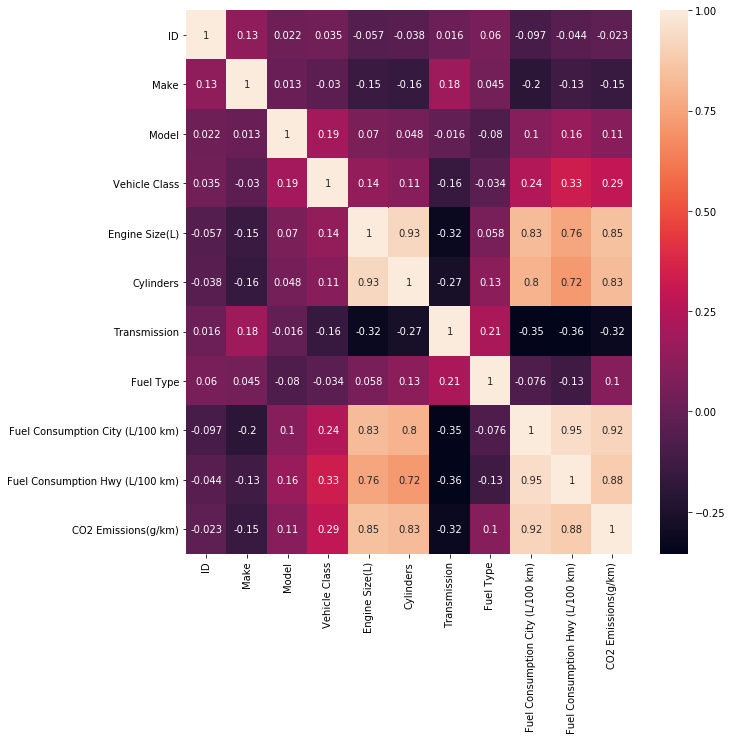

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.head(5)

,ID,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),CO2 Emissions(g/km)
0,1,0,1057,0,2.0,4,14,4,9.9,6.7,196
1,2,0,1057,0,2.4,4,25,4,11.2,7.7,221
2,3,0,1058,0,1.5,4,22,4,6.0,5.8,136
3,4,0,1233,11,3.5,6,15,4,12.7,9.1,255
4,5,0,1499,11,3.5,6,15,4,12.1,8.7,244


In [22]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [23]:
y.value_counts()

242    85
221    82
230    77
214    77
232    76
294    76
258    75
246    75
253    75
209    74
225    72
235    70
193    69
228    68
196    67
198    66
184    66
251    65
200    65
260    64
274    63
207    63
248    61
186    60
216    60
189    60
283    58
237    58
205    56
255    56
       ..
410     1
426     1
430     1
450     1
103     1
392     1
111     1
351     1
379     1
383     1
395     1
423     1
154     1
134     1
118     1
102     1
485     1
473     1
467     1
417     1
405     1
385     1
488     1
476     1
452     1
428     1
420     1
412     1
408     1
453     1
Name: CO2 Emissions(g/km), Length: 331, dtype: int64

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [26]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [27]:
X_test

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km)
6307,32,196,3,-0.123655,0.209958,26,4,-0.159753,-0.391154
5036,23,1483,11,-0.863084,-0.887771,17,0,-0.977726,-0.575161
1995,32,183,3,0.467888,0.209958,9,4,-0.013687,-0.023141
4156,31,279,2,-0.493370,-0.887771,22,3,-1.094579,-1.173182
6328,32,195,3,-0.123655,0.209958,9,4,-0.451886,-0.253149
1696,20,1506,11,-0.567313,-0.887771,6,1,0.482939,0.390874
4313,39,1760,5,0.246059,0.209958,25,3,0.366086,1.172902
5685,9,1844,12,0.320002,0.209958,6,3,0.336873,0.206867
4902,17,1119,11,-1.158855,-0.887771,9,3,-1.036152,-0.483157
6873,15,1724,6,-0.345484,-0.887771,5,3,0.044740,0.896892


In [28]:
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [29]:
y_predict=model.predict(X_test)
y_predict

array([134.4256843 ,  64.96740296, 150.72582188, ..., 121.26135775,
        52.73772378, 113.42171437])

In [30]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.8905430078832607

In [31]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

99.38743863793326

In [32]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

99.52078815766177